# Introduction

The objective for an online tourism website is to implement a targeted marketing strategy, transitioning from a broad outreach to a digital approach, in collaboration with a social networking platform. The aim is to understand and leverage the digital and social behavior of customers to deliver targeted digital advertisements to users who exhibit a high likelihood of purchasing travel products.

Given the relatively higher cost of digital platform advertisements, precision in model creation becomes paramount. The emphasis is on achieving high accuracy to ensure that the marketing budget is effectively utilized and the digital advertisements effectively reach users with a strong inclination to make travel-related purchases.

Recognizing that the propensity to buy tickets varies across different login devices, the task involves developing two separate models—one for laptop users and another for mobile users (where anything other than a laptop is considered as mobile phone usage). This distinction is crucial due to the observed differences in purchasing behavior between these device categories.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.subplots as sp

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("tourism website.csv")

In [3]:
df.head(20)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0.0,8.0
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3.0,12.0
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1.0,1.0
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0.0,10.0
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2.0,17.0


In [4]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} coloumns")

The dataset contains 11760 rows and 17 coloumns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

## EDA

Data Cleaning

## Categorical Coloumn 

Lots of Numeric values seems to be tagged as Object, let's find out by checking their values

In [6]:
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

Value counts for column 'Taken_product':
['Yes' 'No']

Value counts for column 'preferred_device':
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

Value counts for column 'yearly_avg_Outstation_checkins':
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

Value counts for column 'member_in_family':
['2' '1' '4' 'Three' '3' '5' '10']

Value counts for column 'preferred_location_type':
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

Value counts for column 'following_company_page':
['Yes' 'No' 'Yeso' nan '1' '0']

Value counts for column 'working_flag':
['No' 'Yes' '0']



We can see that unexpected values present in different columns, apart from Null

--preferred_device include different values for same e.g. ANDROID' 'Android
--"*" present in yearly_avg_Outstation_checkins
--"Three" present in member_in_family instead of numeric 3
--"Yeso" instead of Yes in following_company_page along with 1 & 0 & Yes & No
--Working flag includes 0 along with No

In [7]:
#Fixing the multiple values in preffered device
#Replacing the repeated values with divice mapping

device_mapping = {'iOS and Android' : "Mobile", 'iOS': "Mobile",'ANDROID': "Mobile",'Android': "Mobile",'Android OS': "Mobile",'Other': "Mobile",
'Others': "Mobile",'Tab': "Mobile"}
df["preferred_device"] = df["preferred_device"].replace(device_mapping)
df["preferred_device"].unique()

array(['Mobile', nan, 'Laptop'], dtype=object)

In [8]:
# "yearly_avg_Outstation_checkins" has '* ' in it, Let's replace it with NAN
df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce', downcast='integer')

df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [9]:
# 'following_company_page' column has "['Yes' 'No' 'Yeso' nan '1' '0']", let's change all to numeric
page_mapping= {'Yes': 1,
          'No' : 0,
          'Yeso' : 1,
              '1': 1,
              '0': 0}
df['following_company_page'] = df['following_company_page'].replace(page_mapping)
df['following_company_page'].unique()

array([ 1.,  0., nan])

In [10]:
#column has "Three", let's change it to 3
df['member_in_family']= df['member_in_family'].replace('Three',3)

# Post changing, let's fix the datatype
# Post changing, let's fix the datatype
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce', downcast='integer')
df['member_in_family'].unique()

array([ 2,  1,  4,  3,  5, 10], dtype=int8)

In [11]:
#Working flag : Replacing 0 with No and changing it to correct type
df['working_flag']= df['working_flag'].replace('0','No')
df["working_flag"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
#Value counts for column 'yearly_avg_Outstation_checkins':
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'],errors='coerce', downcast='integer')

df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

Adult_flag ahould be a categorical variable

In [13]:
df[["Adult_flag","following_company_page"]] = df[["Adult_flag","following_company_page"]].astype("object")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11684 non-null  float64
 6   member_in_family                              11760 non-null  int8   
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

Checking the numeric coloumns

In [15]:
num_columns = df.select_dtypes(exclude=['object']).drop(columns=['UserID'])

#Negative values : The dataset features can not have negative values, hence let's see.
negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)

Columns with negative values:
Index([], dtype='object')


Missing Values

In [16]:
#- Below are the columns & corresponding missing values
df = df.applymap(lambda x:np.nan if x == 'nan' else x) #Replacing all NaN values in string to Np.nan, in case any

Total number of missing values

In [17]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

Total size of the dataset

In [18]:
len(df)

11760

Percentage of missing values in each column

In [19]:
df.isnull().sum()/len(df)*100

UserID                                          0.000000
Taken_product                                   0.000000
Yearly_avg_view_on_travel_page                  4.940476
preferred_device                                0.450680
total_likes_on_outstation_checkin_given         3.239796
yearly_avg_Outstation_checkins                  0.646259
member_in_family                                0.000000
preferred_location_type                         0.263605
Yearly_avg_comment_on_travel_page               1.751701
total_likes_on_outofstation_checkin_received    0.000000
week_since_last_outstation_checkin              0.000000
following_company_page                          0.875850
montly_avg_comment_on_company_page              0.000000
working_flag                                    0.000000
travelling_network_rating                       0.000000
Adult_flag                                      0.008503
Daily_Avg_mins_spend_on_traveling_page          0.008503
dtype: float64

Imputing Missing Values

None of the columns have more high missing values, hence,we will treat these

We will impute all missing

in categorical using Mode
For all Numeric, we will use Median

In [20]:
cat_columns = ['preferred_device', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']

for i in cat_columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [21]:
num_columns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'Daily_Avg_mins_spend_on_traveling_page']
for column in num_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

Checking the missing values after treatment

In [22]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

Checking Duplicated values

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11760 non-null  object 
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11760 non-null  int64  
 7   preferred_location_type                       11760 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [25]:
df[["travelling_network_rating", "Adult_flag"]]= df[["travelling_network_rating", "Adult_flag"]].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11760 non-null  object 
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  float64
 6   member_in_family                              11760 non-null  int64  
 7   preferred_location_type                       11760 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

Summary

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11760.0,2.803452e+02,66.511330,35.0,233.00,271.0,322.00,464.0
total_likes_on_outstation_checkin_given,11760.0,2.816742e+04,14150.080463,3570.0,16697.25,28076.0,40115.25,252430.0
yearly_avg_Outstation_checkins,11760.0,8.196259e+00,8.650950,1.0,1.00,4.0,14.00,29.0
member_in_family,11760.0,2.921344e+00,1.044883,1.0,2.00,3.0,4.00,10.0
Yearly_avg_comment_on_travel_page,11760.0,7.479371e+01,23.815280,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
following_company_page,11760.0,2.803571e-01,0.449193,0.0,0.00,0.0,1.00,1.0
montly_avg_comment_on_company_page,11760.0,2.866088e+01,48.660793,4.0,17.00,22.0,27.00,500.0


User Engagement Metrics: Users exhibit varied engagement levels on the platform, as reflected in metrics such as yearly average views on the travel page, total likes on outstation check-ins, and yearly average comments on the travel page.

User Demographics: User demographics indicate an average family size of approximately 2.88 members, with variability observed.

Check-in Behavior: Users tend to engage in an average of 8.10 outstation check-ins per year, with some variability in behavior. The duration since the last outstation check-in shows variability, potentially influencing current engagement levels.

Social Interaction: Social interaction plays a significant role, as seen in the metrics for total likes on out-of-station check-ins received and monthly comments on the company page. These metrics shows the importance of user interactions within the platform.

Platform Usage Patterns: Users spend an average of 13.64 minutes daily on the traveling page, with variability in daily engagement.

In [27]:
df.select_dtypes(include = ['object']).describe().T


,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11760,2,Mobile,10652
preferred_location_type,11760,15,Beach,2455
working_flag,11760,2,No,9952
travelling_network_rating,11760,5,3,3672
Adult_flag,11760.0,4.0,0.0,5048.0


User Preferences and Behavior: The majority of users have not taken a specific product ("Taken_product: No") and prefer accessing the platform through mobile devices ("Preferred_device: Mobile"). This suggests the data is imbalance

Location Preferences: The most frequent preferred location type is the "Beach", indicating a notable interest in beach-related destinations among users.

Social Interaction and Employment Status: A significant portion of users is not actively following company pages ("Following_company_page: 0") and may currently be unemployed ("Working_flag: No").

Get Correlation between different variables

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

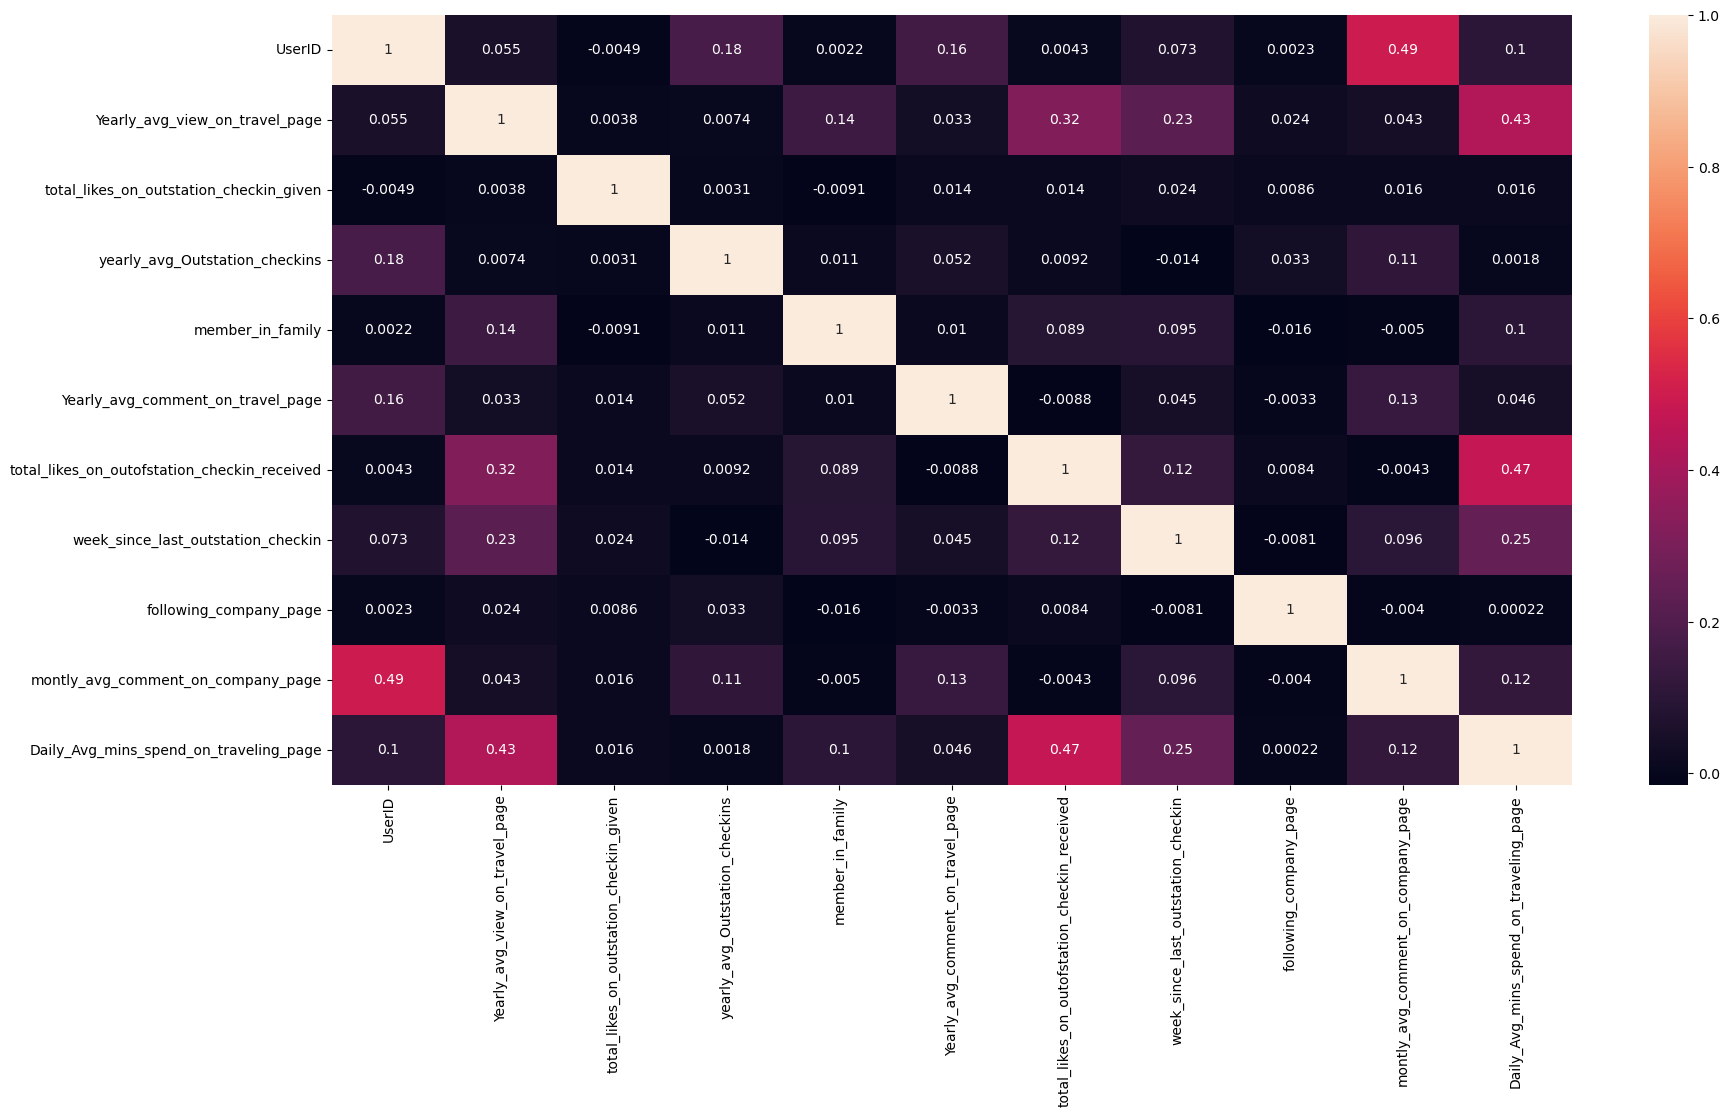

In [28]:
corr = df.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
df.columns

In [32]:
df.to_csv("Tourism_website_engagement_cleaned2.csv", index = False)

In [30]:
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

Value counts for column 'Taken_product':
['Yes' 'No']

Value counts for column 'preferred_device':
['Mobile' 'Laptop']

Value counts for column 'preferred_location_type':
['Financial' 'Other' 'Medical' 'Beach' 'Game' 'Social media'
 'Entertainment' 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel'
 'Historical site' 'Big Cities' 'Trekking' 'Hill Stations']

Value counts for column 'working_flag':
['No' 'Yes']

Value counts for column 'travelling_network_rating':
[1 4 2 3 10]

Value counts for column 'Adult_flag':
[0.0 1.0 3.0 2.0]

